### Method 1 - Using an API

In [4]:
# Import necessary libraries

import praw
import pandas as pd
from datetime import datetime
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [5]:
reddit_read_only = praw.Reddit(client_id="BOwRYk8jihmeRne0dcB76g",
client_secret="9FRzvpgJimtTXGyLlFx9WKOUmFh2nA",
user_agent="Dry_Bus_4156")

subreddit = reddit_read_only.subreddit("TSLA")

posts = subreddit.top(limit=None)

posts_dict = {"Title": [], "Post Text": [],"ID": [], "Score": [],"Total Comments": [], "Post URL": [], "Date": []}

for post in posts:
       posts_dict["Title"].append(post.title)
       posts_dict["Post Text"].append(post.selftext)
       posts_dict["ID"].append(post.id)
       posts_dict["Score"].append(post.score)
       posts_dict["Total Comments"].append(post.num_comments)
       posts_dict["Post URL"].append(post.url)
       date = datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d')
       posts_dict["Date"].append(date)

top_posts = pd.DataFrame(posts_dict)

top_posts.to_csv("Top Posts.csv", index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14800\3044692592.py:18: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d')


In [7]:
top_posts.head()

,Title,Post Text,ID,Score,Total Comments,Post URL,Date
0,Elon Musk confirms his threat: give me 25% of ...,,1cxzh7h,6463,855,https://electrek.co/2024/05/20/elon-musk-confi...,2024-05-22
1,Tesla shareholder group opposes Musk’s $46B pa...,,1cxhppa,3137,352,https://arstechnica.com/tech-policy/2024/05/te...,2024-05-21
2,Norwegian wealth fund to vote against Elon Mus...,,1dc4l08,1945,186,https://apnews.com/article/elon-musk-tesla-ceo...,2024-06-09
3,Tesla CEO Elon Musk could leave if $56 billion...,,1d9qvt9,1899,854,https://www.theverge.com/2024/6/6/24173064/tes...,2024-06-06
4,"Tesla puts '$25,000 electric car' codenamed NV...",TLDR: Musk double downs on robotaxi pushes che...,1cxccga,1870,373,https://electrek.co/2024/04/15/tesla-puts-elec...,2024-05-21


In [8]:
top_posts.tail()

,Title,Post Text,ID,Score,Total Comments,Post URL,Date
993,Goldman Sachs upgrades Tesla stock with $875 p...,,osmza2,15,1,https://youth-investment-group.com/2021/07/27/...,2021-07-27
994,When will it end?,TSLA’s gotta “quit playing games with my heart...,okvsfs,13,21,https://www.reddit.com/r/TSLA/comments/okvsfs/...,2021-07-15
995,Any catalyst for TSLA in coming weeks?,"Thought Plaid S will kick in , why tsla isnt m...",ny7b57,13,18,https://www.reddit.com/r/TSLA/comments/ny7b57/...,2021-06-12
996,what was the trigger for today's 4.4% gain?,This stock is moving crazy. For no reason it g...,nk71gg,13,23,https://www.reddit.com/r/TSLA/comments/nk71gg/...,2021-05-24
997,Discouraged,Why is TSLA going down more and more each day?...,nawmmu,14,30,https://www.reddit.com/r/TSLA/comments/nawmmu/...,2021-05-12


In [9]:
top_posts_sorted = top_posts.sort_values(by='Date')

In [10]:
top_posts_sorted.shape

(998, 7)

In [11]:
top_posts_sorted.head()

,Title,Post Text,ID,Score,Total Comments,Post URL,Date
610,Who is ready for $900 week? Lets go #Bulls,,kpxql9,22,7,https://www.reddit.com/r/TSLA/comments/kpxql9/...,2021-01-04
482,WHO IS READY FOR A 4 DIGIT WEEK!!!,"Now, everyone together: \n\n:-""Our Elon, who a...",l42c49,26,12,https://www.reddit.com/r/TSLA/comments/l42c49/...,2021-01-24
217,Great Opportunity to buy the dip on TSLA,Next quarter earning will be great with China ...,l84bwg,44,35,https://www.reddit.com/r/TSLA/comments/l84bwg/...,2021-01-29
322,My return on TSLA. Bought $50 as a 16 year old...,,lely20,32,11,https://i.redd.it/9g8bw9m6z1g61.jpg,2021-02-07
36,I TOLD YOU SO,"Ok guys, it was fun while it lasted:\n\nhttps:...",lfbwp9,417,77,https://www.reddit.com/r/TSLA/comments/lfbwp9/...,2021-02-08


In [12]:
top_posts_sorted.tail()

,Title,Post Text,ID,Score,Total Comments,Post URL,Date
815,What is your expectation of the earning report...,Will it drive TSLA to sub 300?,1hsamy0,16,37,https://www.reddit.com/r/TSLA/comments/1hsamy0...,2025-01-03
720,Who is this guy?,"What's with this guy, Gordan Johnson, (GLJ Res...",1hstiik,19,31,https://www.reddit.com/r/TSLA/comments/1hstiik...,2025-01-03
884,BUY BUY BUY!!!!,Im not a financial advisor but if you buy tesl...,1hsxafk,17,149,https://www.reddit.com/r/TSLA/comments/1hsxafk...,2025-01-03
245,Looks like it will settle around $400 until ea...,"Unless there's some real news, I think TSLA wi...",1hv4ros,40,108,https://www.reddit.com/r/TSLA/comments/1hv4ros...,2025-01-06
519,Buy!,I am expecting a massive move from Tesla befor...,1hww6un,24,183,https://www.reddit.com/r/TSLA/comments/1hww6un...,2025-01-08


In [13]:
df_TSLA= top_posts_sorted[['Date','Title'] ]

In [14]:
df_TSLA.head()

,Date,Title
610,2021-01-04,Who is ready for $900 week? Lets go #Bulls
482,2021-01-24,WHO IS READY FOR A 4 DIGIT WEEK!!!
217,2021-01-29,Great Opportunity to buy the dip on TSLA
322,2021-02-07,My return on TSLA. Bought $50 as a 16 year old...
36,2021-02-08,I TOLD YOU SO


In [15]:
df_TSLA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 610 to 519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    998 non-null    object
 1   Title   998 non-null    object
dtypes: object(2)
memory usage: 23.4+ KB


In [16]:
df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date'], errors='coerce')

C:\Users\User\AppData\Local\Temp\ipykernel_14800\36944872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date'], errors='coerce')


### Getting datasets from 'yfinance'

In [18]:
import yfinance as yf

symbols = ['TSLA']

interval = '1d'
period = '5y'

dfs = {}

for symbol in symbols:
    dfs[symbol] = yf.download(symbol, interval=interval, period=period)
    
    dfs[symbol].index.name = 'Date'
    
    dfs[symbol].index = pd.to_datetime(dfs[symbol].index, format='%Y-%m-%d %H:%M:%S')
    
    dfs[symbol] = dfs[symbol].sort_index()
    
    dfs[symbol].columns = ['Close', 'High', 'Low', 'Open', 'Volume']
    
    print(f"Data for {symbol}:")
    print(dfs[symbol].head())
    print("\n")

[*********************100%***********************]  1 of 1 completed

Data for TSLA:
                Close       High        Low       Open     Volume
Date                                                             
2020-01-14  35.861332  36.493999  34.993332  36.284000  434943000
2020-01-15  34.566666  35.855999  34.452667  35.317333  260532000
2020-01-16  34.232666  34.297333  32.811333  32.916668  326050500
2020-01-17  34.033333  34.377998  33.543999  33.840668  204436500
2020-01-21  36.480000  36.571999  35.227333  35.349998  267052500




In [19]:
df_TSLA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 610 to 519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    998 non-null    datetime64[ns]
 1   Title   998 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 23.4+ KB


In [20]:
df_TSLA.head()

,Date,Title
610,2021-01-04,Who is ready for $900 week? Lets go #Bulls
482,2021-01-24,WHO IS READY FOR A 4 DIGIT WEEK!!!
217,2021-01-29,Great Opportunity to buy the dip on TSLA
322,2021-02-07,My return on TSLA. Bought $50 as a 16 year old...
36,2021-02-08,I TOLD YOU SO


In [21]:
sent_df_TSLA = df_TSLA.copy()
sent_df_TSLA["Sentiment_score"] = ''
sent_df_TSLA["Negative"] = ''
sent_df_TSLA["Neutral"] = ''
sent_df_TSLA["Positive"] = ''
sent_df_TSLA.head()

,Date,Title,Sentiment_score,Negative,Neutral,Positive
610,2021-01-04,Who is ready for $900 week? Lets go #Bulls,,,,
482,2021-01-24,WHO IS READY FOR A 4 DIGIT WEEK!!!,,,,
217,2021-01-29,Great Opportunity to buy the dip on TSLA,,,,
322,2021-02-07,My return on TSLA. Bought $50 as a 16 year old...,,,,
36,2021-02-08,I TOLD YOU SO,,,,


In [22]:
# Importing varder pre-train model for sentiment analysis

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
# Getting sentiment scores using the vader model for the data extracted from the API.

import unicodedata
from nltk.sentiment import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()
for indx, row in sent_df_TSLA.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', sent_df_TSLA.loc[indx, 'Title'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        sent_df_TSLA.at[indx, 'Sentiment_score'] = sentence_sentiment['compound']
        sent_df_TSLA.at[indx, 'Negative'] = sentence_sentiment['neg']
        sent_df_TSLA.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sent_df_TSLA.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (sent_df_TSLA.loc[indx, 'Title'])
        print (indx)
        break

In [24]:
sent_df_TSLA = sent_df_TSLA.drop(columns=['Negative', 'Positive', 'Neutral', 'Title'])

In [25]:
sent_df_TSLA = sent_df_TSLA.groupby([sent_df_TSLA['Date']]).mean()
print(sent_df_TSLA.shape)

(649, 1)


In [26]:
sent_df_TSLA.index

DatetimeIndex(['2021-01-04', '2021-01-24', '2021-01-29', '2021-02-07',
               '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-12',
               '2021-02-13', '2021-02-16',
               ...
               '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
               '2024-12-31', '2025-01-01', '2025-01-02', '2025-01-03',
               '2025-01-06', '2025-01-08'],
              dtype='datetime64[ns]', name='Date', length=649, freq=None)

In [27]:
sent_df_TSLA.index[0]

Timestamp('2021-01-04 00:00:00')

In [28]:
sent_df_TSLA.index[-1]

Timestamp('2025-01-08 00:00:00')

In [29]:
sent_df_TSLA.index = pd.to_datetime(sent_df_TSLA.index)

In [30]:
start_date = sent_df_TSLA.index[0]
end_date = sent_df_TSLA.index[-1]

dfs['TSLA'] = dfs['TSLA'].loc[start_date:end_date]

In [31]:
final_df_TSLA = dfs['TSLA'].join(sent_df_TSLA, how="left", on="Date")
print(final_df_TSLA.shape)

(1010, 6)


In [32]:
final_df_TSLA = final_df_TSLA.reset_index()

In [33]:
final_df_TSLA.head()

,Date,Close,High,Low,Open,Volume,Sentiment_score
0,2021-01-04,243.256668,248.163330,239.063339,239.820007,145914600,0.3612
1,2021-01-05,245.036667,246.946671,239.733337,241.220001,96735600,NaN
2,2021-01-06,251.993332,258.000000,249.699997,252.830002,134100000,NaN
3,2021-01-07,272.013336,272.329987,258.399994,259.209991,154496700,NaN
4,2021-01-08,293.339996,294.829987,279.463318,285.333344,225166500,NaN


In [34]:
final_df_TSLA.tail()

,Date,Close,High,Low,Open,Volume,Sentiment_score
1005,2025-01-02,379.279999,392.730011,373.040009,390.100006,109710700,-0.0583
1006,2025-01-03,410.440002,411.880005,379.450012,381.480011,95423300,0.0
1007,2025-01-06,411.049988,426.429993,401.700012,423.200012,85516500,0.3612
1008,2025-01-07,394.359985,414.329987,390.000000,405.829987,75699500,NaN
1009,2025-01-08,394.940002,402.500000,387.399994,392.950012,73038800,0.0


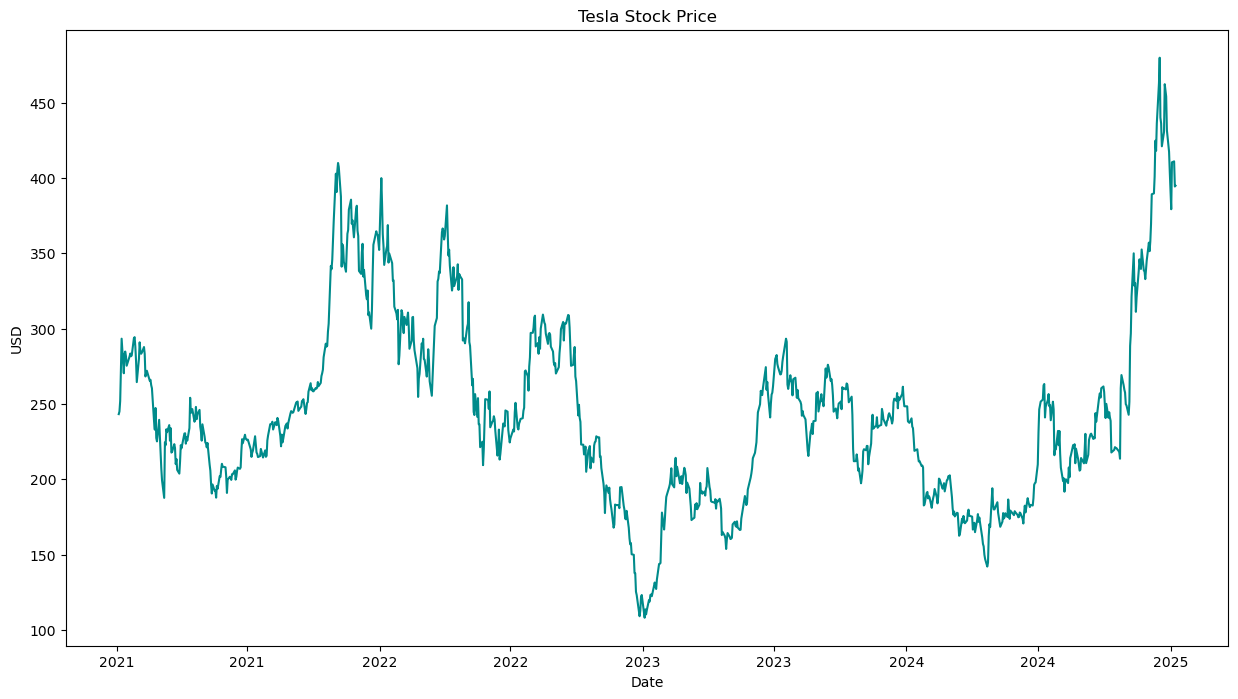

In [35]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(final_df_TSLA['Date'], final_df_TSLA['Close'], color='#008B8B')
ax.set(xlabel="Date", ylabel="USD", title=f"Tesla Stock Price")
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.show()

In [36]:
final_df_TSLA.iloc[:, 1:] = pd.concat([final_df_TSLA.iloc[:, 1:].ffill()])

C:\Users\User\AppData\Local\Temp\ipykernel_14800\974426433.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df_TSLA.iloc[:, 1:] = pd.concat([final_df_TSLA.iloc[:, 1:].ffill()])


In [37]:
final_df_TSLA = final_df_TSLA.reset_index(drop=True)

In [38]:
Tesla = final_df_TSLA[['Close', 'Sentiment_score']]

X_Tesla = []
y_Tesla = []


for i in range(2, len(Tesla)):
    
    X_Tesla.append(Tesla.iloc[i-2:i][['Close', 'Sentiment_score']].values)  
    y_Tesla.append(Tesla['Close'].iloc[i])    

# Converting the lists into numpy arrays with float type
X_Tesla = np.array(X_Tesla, dtype=float)  # Shape: (samples, 2, 2)
y_Tesla = np.array(y_Tesla, dtype=float)  # Shape: (samples,)

# Checking for any missing values
if np.isnan(X_Tesla).any() or np.isnan(y_Tesla).any():
    raise ValueError("Input data contains NaN values. Please handle missing values before training.")

# Checking the shapes of the arrays to confirm correctness
print("Shape of X_Tesla:", X_Tesla.shape)  # Expected: (n, 2, 2)
print("Shape of y_Tesla:", y_Tesla.shape)  # Expected: (n,)

Shape of X_Tesla: (1008, 2, 2)
Shape of y_Tesla: (1008,)


In [39]:
# Determining the training length (80% of the data)
train_len_Tesla = math.ceil(len(Tesla) * 0.8)
print("Training samples:", train_len_Tesla)

Training samples: 808


In [40]:
X_Tesla_train,y_Tesla_train = X_Tesla[:train_len_Tesla],y_Tesla[:train_len_Tesla]

In [41]:
X_Tesla_train.shape

(808, 2, 2)

In [42]:
# Defining the LSTM model with correct input_shape
model_Tesla = Sequential()
model_Tesla.add(LSTM(50, activation='relu', input_shape=(X_Tesla_train.shape[1], X_Tesla_train.shape[2])))
model_Tesla.add(Dense(25))
model_Tesla.add(Dense(1))

# Compiling the model
model_Tesla.compile(loss='mean_squared_error', optimizer='adam')

# Displaying the model summary
model_Tesla.summary()

# Training the model
model_Tesla.fit(X_Tesla_train, y_Tesla_train, epochs=20, batch_size=32, verbose=2)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,901 (46.49 KB)

 Trainable params: 11,901 (46.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
26/26 - 2s - 87ms/step - loss: 56365.1094
Epoch 2/20
26/26 - 0s - 6ms/step - loss: 13625.1982
Epoch 3/20
26/26 - 0s - 5ms/step - loss: 526.9966
Epoch 4/20
26/26 - 0s - 4ms/step - loss: 146.2261
Epoch 5/20
26/26 - 0s - 4ms/step - loss: 106.3966
Epoch 6/20
26/26 - 0s - 4ms/step - loss: 106.1931
Epoch 7/20
26/26 - 0s - 6ms/step - loss: 105.8277
Epoch 8/20
26/26 - 0s - 6ms/step - loss: 106.1428
Epoch 9/20
26/26 - 0s - 4ms/step - loss: 106.0820
Epoch 10/20
26/26 - 0s - 4ms/step - loss: 107.7036
Epoch 11/20
26/26 - 0s - 5ms/step - loss: 105.8692
Epoch 12/20
26/26 - 0s - 7ms/step - loss: 101.6846
Epoch 13/20
26/26 - 0s - 7ms/step - loss: 95.6387
Epoch 14/20
26/26 - 0s - 6ms/step - loss: 93.2625
Epoch 15/20
26/26 - 0s - 5ms/step - loss: 89.2443
Epoch 16/20
26/26 - 0s - 6ms/step - loss: 93.2275
Epoch 17/20
26/26 - 0s - 6ms/step - loss: 89.0376
Epoch 18/20
26/26 - 0s - 6ms/step - loss: 87.2224
Epoch 19/20
26/26 - 0s - 6ms/step - loss: 86.1771
Epoch 20/20
26/26 - 0s - 5ms/step - loss: 

In [43]:
X_Tesla_test,y_Tesla_test = X_Tesla[train_len_Tesla-2:],y_Tesla[train_len_Tesla-2:]

In [44]:
X_Tesla_test.shape

(202, 2, 2)

In [45]:
y_Tesla_test.shape

(202,)

<Axes: >

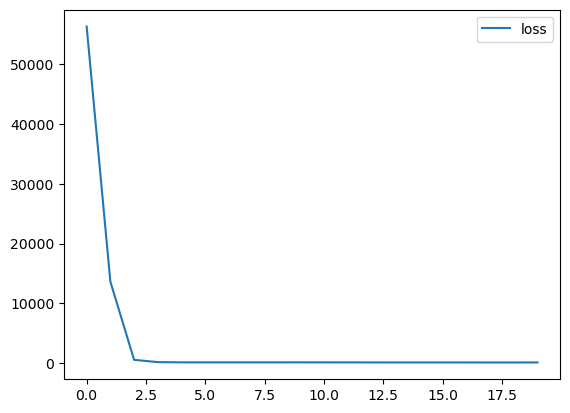

In [46]:
losses_Tesla = pd.DataFrame(model_Tesla.history.history)
losses_Tesla[['loss']].plot()

In [47]:
prediction_Tesla = model_Tesla.predict(X_Tesla_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

print('Test RMSE for Tesla:', np.sqrt(mean_squared_error(y_Tesla_test, prediction_Tesla)))
print('Test MAPE for Tesla:', np.sqrt(mean_absolute_percentage_error(y_Tesla_test, prediction_Tesla)))

Test RMSE for Tesla: 12.001601114554314
Test MAPE for Tesla: 0.1775276754072078


In [49]:
# Checking for model accuracy

lstm_train_pred_Tesla = model_Tesla.predict(X_Tesla_train)
lstm_test_pred_Tesla = model_Tesla.predict(X_Tesla_test)
print('Train rmse for Tesla:', np.sqrt(mean_squared_error(y_Tesla_train, lstm_train_pred_Tesla)))
print('Test rmse for Tesla:', np.sqrt(mean_squared_error(y_Tesla_test, lstm_test_pred_Tesla)))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Train rmse for Tesla: 9.562565253418805
Test rmse for Tesla: 12.001601114554314


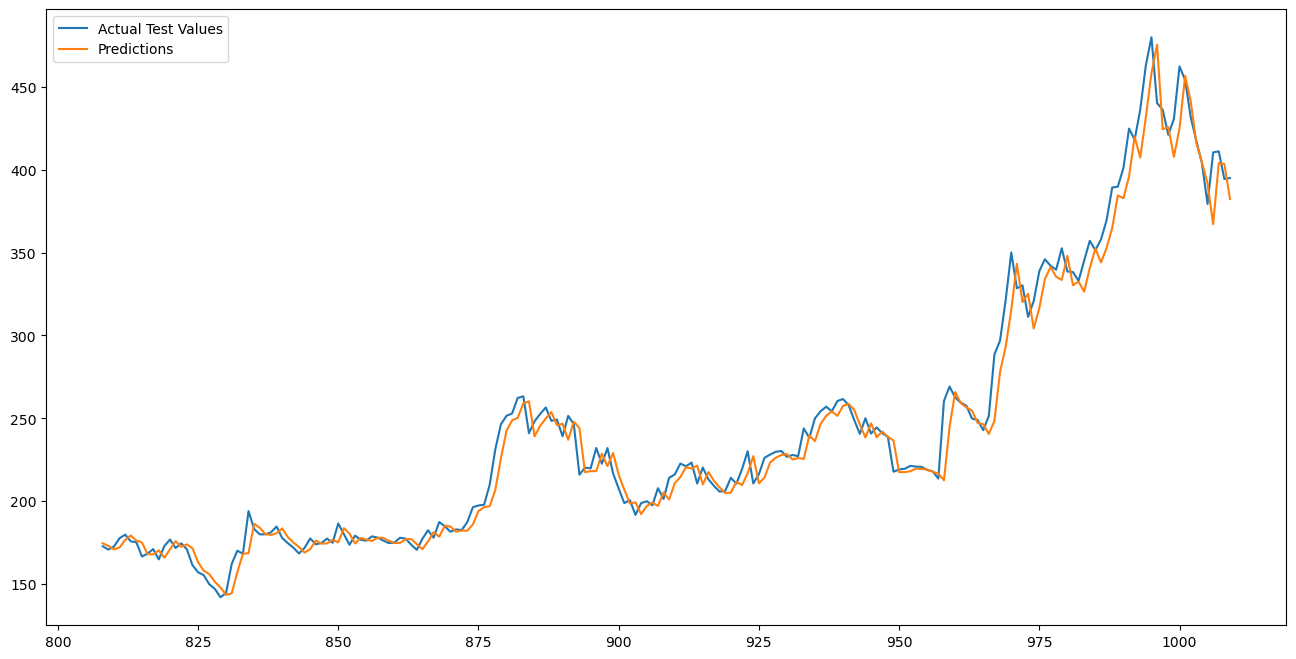

In [50]:
# Plotting the test and the prediction values 

x=df_TSLA.iloc[-len(y_Tesla_test):]['Date'].values
test_Tesla = pd.DataFrame(Tesla[train_len_Tesla:])
test_Tesla['Predictions']=lstm_test_pred_Tesla
plt.figure(figsize=(16,8))
# plt.plot(x ,test_Tesla['Close'] )
# plt.plot(x ,test_Tesla['Predictions'] )
plt.plot(test_Tesla[['Close','Predictions']])
plt.legend(['Actual Test Values','Predictions'])
plt.show()

In [51]:
# Resetting the index to default integers

test_Tesla = test_Tesla.reset_index(drop=True)

variance_Tesla = []
for i in range(len(test_Tesla)):
    variance = test_Tesla['Close'][i] - test_Tesla['Predictions'][i]
    variance_Tesla.append(variance)

# Converting the list to a DataFrame
variance_Tesla = pd.DataFrame(variance_Tesla, columns=['Variance'])

# Outputting descriptive statistics
print(variance_Tesla.describe())

         Variance
count  202.000000
mean     3.782813
std     11.418151
min    -35.171814
25%     -3.011944
50%      1.598961
75%      8.964184
max     47.844345


### Visualization of train, test and the prediction values in a single plot

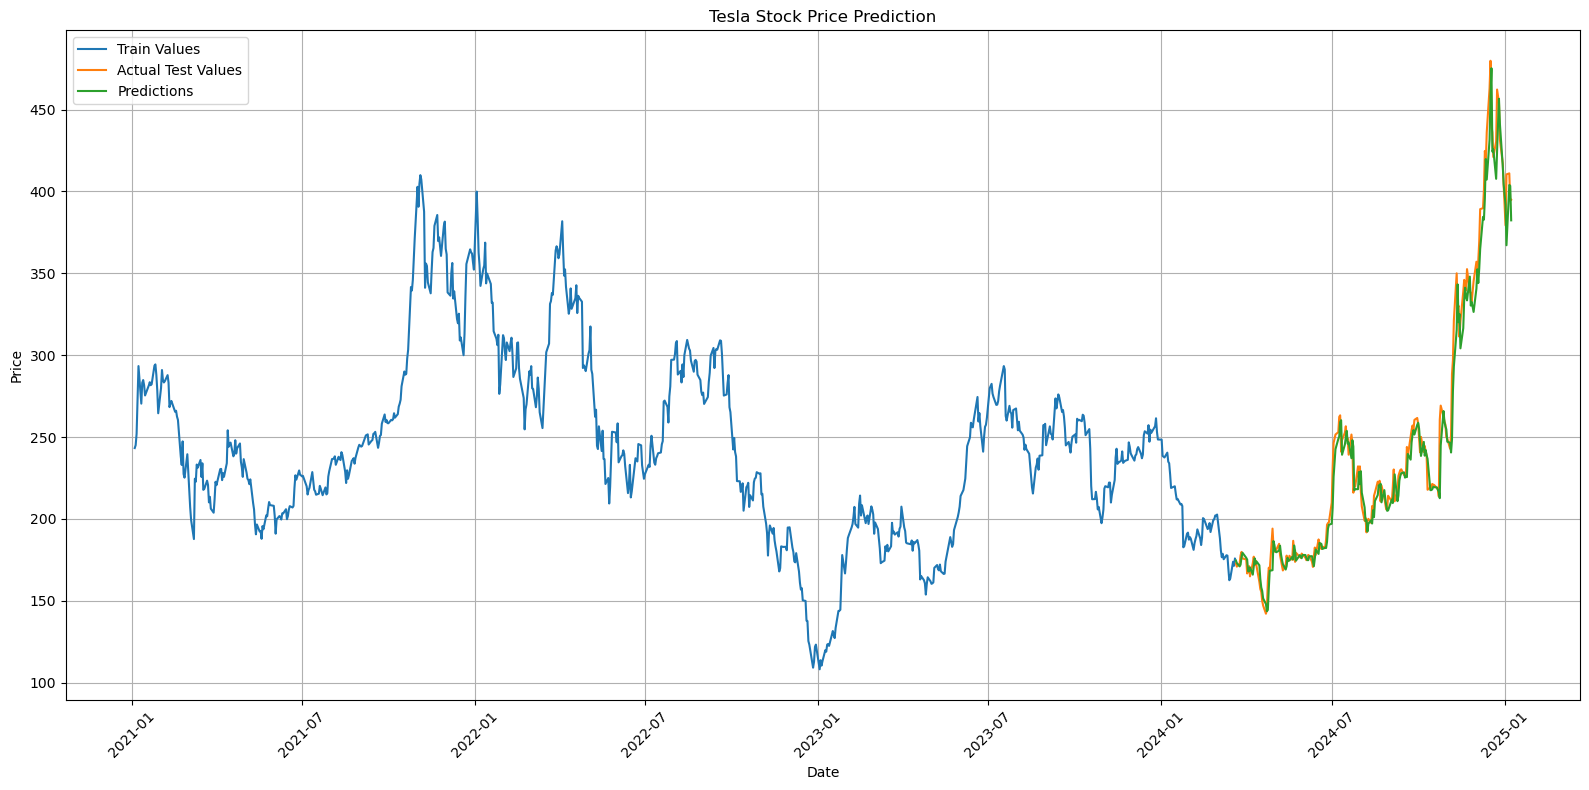

In [53]:
# Creating a dataframe to store actual and predicted values
train_Tesla = pd.DataFrame(Tesla[:train_len_Tesla])
train_Tesla['Date'] = final_df_TSLA.iloc[:train_len_Tesla]['Date'].values
train_Tesla['Type'] = 'Train'
 
test_Tesla = pd.DataFrame(Tesla[train_len_Tesla:])
test_Tesla['Date'] = final_df_TSLA.iloc[train_len_Tesla:]['Date'].values
test_Tesla['Type'] = 'Test'
test_Tesla['Predictions'] = lstm_test_pred_Tesla
 
# Creating the plot
plt.figure(figsize=(16,8))
 
# Plotting training values
plt.plot(train_Tesla['Date'], train_Tesla['Close'], label='Train Values')
 
# Plotting test values
plt.plot(test_Tesla['Date'], test_Tesla['Close'], label='Actual Test Values')
 
# Plotting predicted values
plt.plot(test_Tesla['Date'], test_Tesla['Predictions'], label='Predictions')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Tesla Stock Price Prediction')
plt.legend(['Train Values', 'Actual Test Values', 'Predictions'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [54]:
number_of_features = 2 

last_sequence = X_Tesla_test[-1].flatten()

last_sequence_reshaped = last_sequence.reshape(1, -1, number_of_features)


next_2_days_predictions = []


for _ in range(2): 
    predicted_price = model_Tesla.predict(last_sequence_reshaped)[0][0]
    next_2_days_predictions.append(predicted_price)
    
    last_sequence = np.append(last_sequence[number_of_features:], [predicted_price]*number_of_features)
    last_sequence_reshaped = last_sequence.reshape(1, -1, number_of_features)

print(f"Predicted prices for the next 2 days TSLA: {next_2_days_predictions}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted prices for the next 2 days TSLA: [382.36905, 223.12595]


In [55]:
import numpy as np
from datetime import datetime, timedelta

number_of_features = 2 

last_sequence = X_Tesla_test[-1].flatten()

last_sequence_reshaped = last_sequence.reshape(1, -1, number_of_features)

next_2_days_predictions = []
predicted_dates = []

current_date = datetime.today()

for i in range(2): 
    predicted_price = model_Tesla.predict(last_sequence_reshaped)[0][0]
    next_2_days_predictions.append(predicted_price)
    

    next_date = current_date + timedelta(days=i+1)
    predicted_dates.append(next_date.strftime('%Y-%m-%d'))  
    
    last_sequence = np.append(last_sequence[number_of_features:], [predicted_price]*number_of_features)
    last_sequence_reshaped = last_sequence.reshape(1, -1, number_of_features)


for date, price in zip(predicted_dates, next_2_days_predictions):
    print(f"Predicted price for {date}: {price}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted price for 2025-01-15: 382.3690490722656
Predicted price for 2025-01-16: 223.12594604492188
